# The Local Cluster Survey I: Probing Gas Stripping in Nearby Groups and Clusters

PAPER 1

* Present analysis procedure
    * simulation results
* Limit analysis to blue galaxies; no AGN included
* statistics on size
* Size of blue galaxies vs.
    * stellar mass -  evidence of environmental effect in lowest mass bin
    * B/T - correlated
    * local density or $\Delta r$ - correlated

** RESULTS ** 

* size of SF region is smaller than stellar disk
* size of lowest mass galaxies is significantly smaller in cluster environment.
* size is correlated with B/T 
* size is also correlated with local density and projected radius
* blue cluster galaxies have smaller size ratios, and this is not explained just with $B/T$ because field and cluster sample have similar distributions of $B/T$.  
* This indicates that the relative size of the SF region is linked with structural property of galaxies, but there is an additional impact of environment.

PAPER 2

Add SFRs to analysis.  Focus on size, stellar mass, SFR relation

* field/cluster samples are comparable in terms of stellar mass, B/T, SFR
* cluster galaxies have smaller size
* cluster and field galaxies are still consistent with the SF main sequence

** RESULTS ** 

* blue galaxies in dense environments have sSFRs that are consistent with the SF main sequence despite having more centrally-concentrated SF disks.
* starburst galaxies have more centrally-concentrated SF disks when compared with galaxies on the SF main sequence, and relative size of SF disk does not appear to vary with environment for these galaxies.
* Coma has an unusually high fraction of starburst galaxies

In [2]:
import numpy as np
from pylab import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## The Local Cluster Survey Sample

In [4]:
%run ~/Dropbox/pythonCode/LCSanalyzespirals.py

did not find  99840
did not find  146607


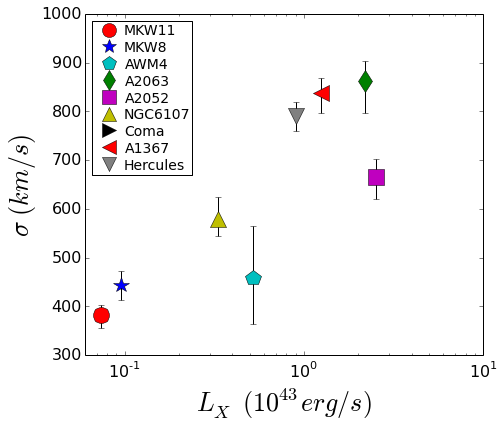

In [5]:
# updating sigma vs LX to include errorbars on sigma values

plotsigmaLx()

## Velocity Dispersion and Redshifts

In [81]:
%run ~/Dropbox/pythonCode/LCSbiweight.py

MKW11
Coma


In [82]:
getbiweightall()

A1367 0.836817006933
     A1367: center=  6505 ( 6505) + 55- 54 scale=  838 ( 838) + 31- 42
MKW11 1.01917934004
     MKW11: center=  6904 ( 6904) + 38- 49 scale=  383 ( 383) + 19- 27
Coma 1.0126710561
      Coma: center=  7011 ( 7011) + 45- 44 scale= 1054 (1054) + 26- 29
MKW8 0.866776259608
      MKW8: center=  8039 ( 8039) + 40- 38 scale=  443 ( 443) + 29- 31
NGC6107 0.766688962335
   NGC6107: center=  9356 ( 9397) + 57- 53 scale=  578 ( 630) + 47- 34
AWM4 0.741169392254
      AWM4: center=  9604 ( 9604) + 61- 55 scale=  458 ( 458) +107- 95
A2063 0.676215337666
     A2063: center= 10410 (10410) + 72- 71 scale=  862 ( 862) + 42- 65
A2052 0.666097409002
     A2052: center= 10431 (10431) + 57- 64 scale=  666 ( 666) + 37- 45
Hercules 0.64007516195
  Hercules: center= 10917 (10917) + 50- 53 scale=  790 ( 790) + 29- 31


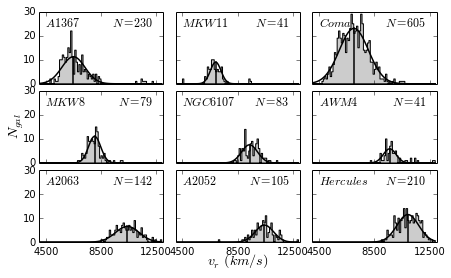

In [83]:
plotall()

## Calculating Local Galaxy Density

Bianca asked about the specifics of how I calculate local density.  I need to dig through code to figure out exactly what I do.

Looks like I calculate local density in 

    LCSwritemasterNSA.py
    
The local density measurements are written to 

    homedir+'research/LocalClusters/NSAmastertables/LocalDensityTables/'+self.prefix+'_localdensity.fits'
    
    
These are read by 

    LCSReadmasterBaseNSA.py
    
as self.ld

When the columns are merged: 

    LCSmergespiralcats.py
    
    calls  
    
    LCSReadmasterBaseNSA.py
    
for each cluster and the following columns are added to the merged table

    ld_columns=['SIGMA_NN','SIGMA_5','SIGMA_10','RHOMASS']
    
    
The local density measurements use the SDSS spectroscopic sample, so all $r < 17.7$ galaxies are included.  It would be more appropriate to use an absolute magnitude cut because we are sampling clusters at a range of redshifts.  Using the apparent magnitude cut will make Coma's local density measurements greater than Hercules, just because of the different distances to each cluster.  **Therefore, I should redo the local density cuts and use an absolute r-band magnitude cut.**

The appropriate absolute magnitude cut is $M_r$ that corresponds to $r=17.7$ at Hercules.  I already refer to this in the paper.

*The stellar mass limit is determined
primarily by the SDSS spectroscopic limit of $r=17.7$.  This
corresponds to an absolute magnitude of $M_r = -22.3$ at the
distance to Hercules ($m-M=35.97$), our furthest cluster.*

Therefore, I should use $M_r = -22.3$ cut when calculating local density.

Checking distance modulus.  

$$ m_2 - m_1 = 2.5 \log_{10}(f_1/f_2) $$

$$ m - M = 2.5 \log_{10}\left( \frac{L}{4 \pi (10~pc)^2} \frac{4 \pi d_{pc}^2}{L} \right) $$

$$ m - M = 5 \log_{10} (d_{pc}) - 5 $$

For Hercules, $z = 0.037$ and 

$$ d_{Mpc} = z * c /H_0  = (0.037)(3.e5)/(70~km/s/Mpc) = 158.6~Mpc$$

Thus 

$$ m - M = 5 \log_{10} (158.6e6) - 5 = 36.00 $$

To get the absolute magnitude corresponding to $r = 17.7$

$$ M = m - 36 = 17.7 - 36 = -18.3 $$


Run:

    LCSCalcLocalDensity.py -m -18.3 -v 2500
    
    LCSmergespiralcats.py -r
    mergedata()
    s=spirals()
    
    

## Comparing Field and Cluster Samples

In [9]:
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py

%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  all


KS test comparing members and field
KS Test:
D =   0.15
p-vale = 0.29504 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.87
p-vale = 0.87688 (prob that samples are from same distribution)
KS test comparing members and field
KS Test:
D =   0.18
p-vale = 0.23889 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.14
p-vale = 0.30063 (prob that samples are from same distribution)
KS test comparing members and field
KS Test:
D =   0.22
p-vale = 0.03133 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   1.45
p-vale = 0.08150 (prob that samples are from same distribution)
KS test comparing members and field
KS Test:
D =   0.15
p-vale = 0.32336 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.96
p-vale = 0.97061 (prob that samples are from same distribution)


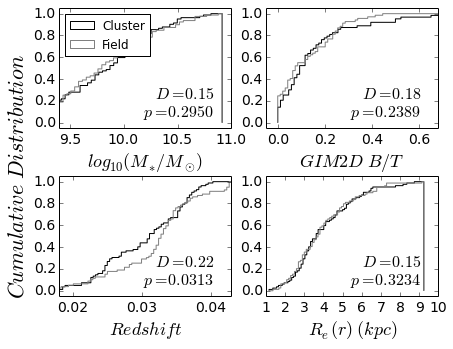

In [10]:
s.compare_cluster_field()

No serious systematics between field and cluster samples.

## 24um Image Fits

I updated LCSmaketileplot.py so that a given galaxy wouldn't be repeated when randomly selecting galaxies within a certain range of size ratios (using numpy.random.shuffle).

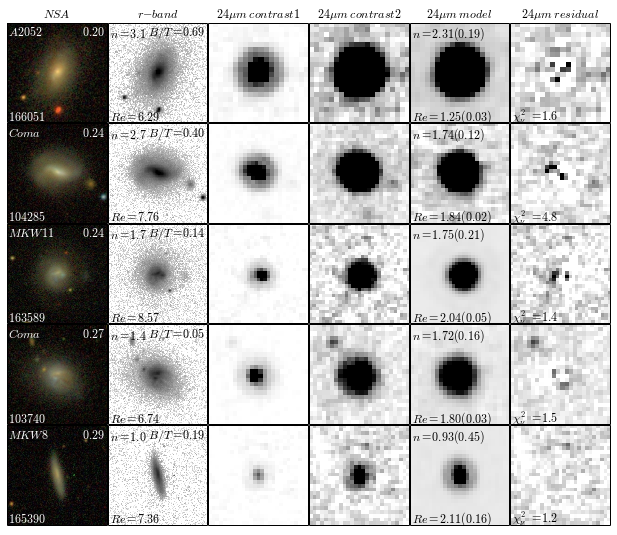

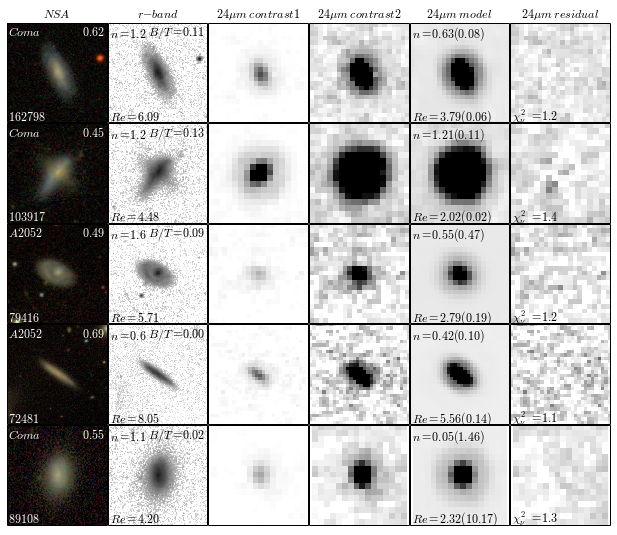

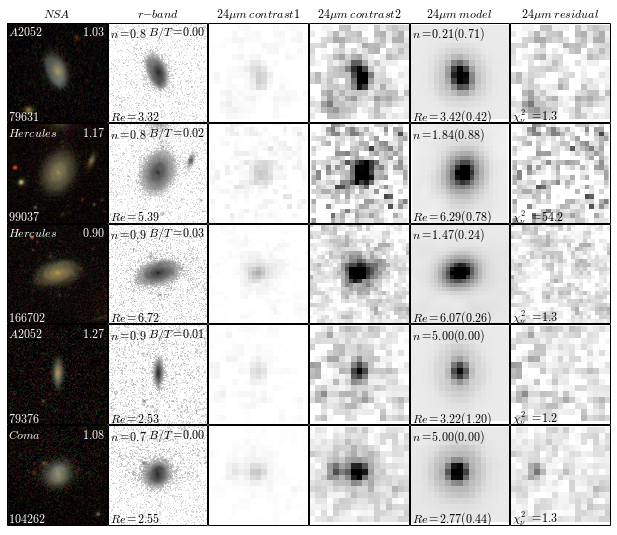

In [85]:
# run LCSmaketileplot.py
%run ~/Dropbox/pythonCode/LCSmaketileplot.py

# plot galaxies with size ratios between 0.1 and .3
# 0 < Re(24)/Re(r) < 0.3
paperplots()
#s.plotcolor_subset(size1=0,size2=0.3,showall=False)
#savefig(homedir+'research/LocalClusters/SamplePlots/cutouts_smallsize.png')
#savefig(homedir+'research/LocalClusters/SamplePlots/cutouts_smallsize.eps')

# plot galaxies with size ratios between 0.3 and 0.6
# 0.3 < Re(24)/Re(r) < 0.6
#s.plotcolor_subset(size1=0.4,size2=0.6,showall=False)
#savefig(homedir+'research/LocalClusters/SamplePlots/cutouts_medsize.png')
#savefig(homedir+'research/LocalClusters/SamplePlots/cutouts_medsize.eps')

# plot galaxies with size ratios greater than 0.75
# 0.75 < Re(24)/Re(r) 
#s.plotcolor_subset(size1=0.75,size2=2,showall=False)
#savefig(homedir+'research/LocalClusters/SamplePlots/cutouts_largesize.png')
#savefig(homedir+'research/LocalClusters/SamplePlots/cutouts_largesize.eps')

As of 1/6/16, need to make one more pass through the sample and remove galaxies that are blended with nearby companion.  Not sure if people think the numbers in each panel are useful.  

Galaxies that are blended with a nearby companion are:

* 99056 - Hercules
* 103927 - Coma
* 103933 (AGN) - Coma
* 140160 - A1367
* 143485 - MKW11
* 146607 - Hercules

*ALSO* running this from ipython and using *paperplots()*.


## Relative size of IR versus Stellar Disk

Changed in May 2016 to normalize the size of the 24um emission using the size of the r-band disk only.  The disk sizes are from Simard+11 B/D decompositions.  The sense of the results are the same, but the average ratio of $R_e(24)/R_e(r)$ is now close to one; when I normalized using $R_e$ from the single-component Sersic fit, the average/median ratio of $R_e(24)/R_e(r) = 0.6-0.7$.

In [24]:
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py

%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  all


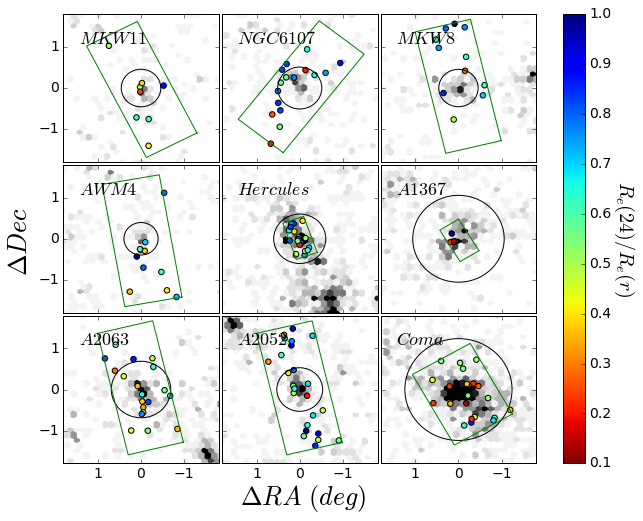

In [4]:
plotpositionson24()

flag =  3 4 0
number of upper limits =  0
flag =  6 9 3
number of upper limits =  0
flag =  2 7 1
number of upper limits =  0
flag =  3 6 1
number of upper limits =  0
flag =  18 0 0
number of upper limits =  0
flag =  3 0 1
number of upper limits =  0
flag =  10 8 0
number of upper limits =  0
flag =  7 16 3
number of upper limits =  0
flag =  18 1 5
number of upper limits =  0


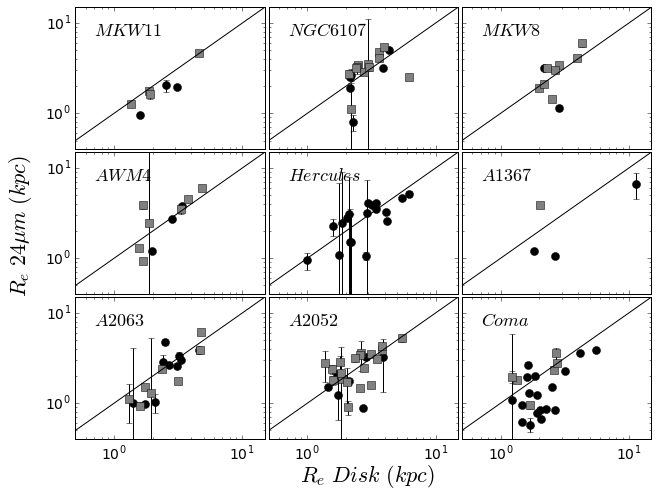

In [5]:
plotRe24vsReall()

comparing cluster and field SF galaxies
KS Test:
D =   0.37
p-vale = 0.00012 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   7.91
p-vale = 0.00045 (prob that samples are from same distribution)


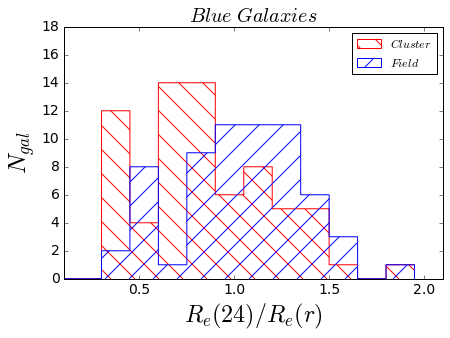

In [6]:
s.plotsizehist()

mean (median) = -0.14 (-0.14), std =  0.05
confidence interval from sorted list of MC fit values:
lower = -0.19 (-0.19), upper = -0.08 (-0.08)
probability that distribution of slopes is normal =  0.28
[2 3 2 1 3 3 4 2 0 2 1 4 3 4 1 2 1 2 1 2 3 2 0 4 2 3 2 3 4 2 3 3 2 3 2 1 3
 1 1 3 1 4 2 1 1 1 0 2 2 1 5 0 3 1 4 1 3 2 2 1 2 2 1 1 2 1 2 0 3 2]
weighted median =  1.13594499565
weighted median =  0.717180706654
weighted median =  0.575488073642
weighted median =  0.676101062043
weighted median =  0.778958566341
weighted median =  0.325830927313
i =  1
ybin[1] =  0.717180706654
ybinerr[1] =  0.29584726911
mean (median) = -0.16 (-0.16), std =  0.07
confidence interval from sorted list of MC fit values:
lower = -0.23 (-0.23), upper = -0.08 (-0.09)
probability that distribution of slopes is normal =  0.20
[3 1 2 1 2 2 4 2 4 1 2 4 1 4 1 2 1 3 2 1 1 1 2 1 5 3 1 1 2 1 3 1 3 2 2 3 3
 1 4 4 3 2 2 2 4 1 1 5 2 1 2 2 0 2 3 4 1 1 1 3 1 2 3 1 2]
weighted median =  1.18329272605
weighted median =  1.0191

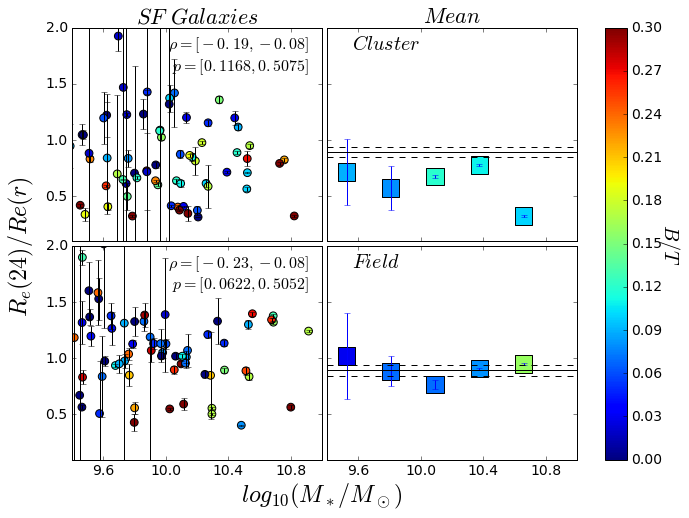

In [25]:
s.plotsizestellarmassblue()

In [28]:
print 'Field size ratios (Re(24)/Re(r)):'
flag=s.sampleflag & ~s.agnflag & ~s.membflag & s.gim2dflag
print 'mean = %5.2f'%(np.mean(s.sizeratio[flag]))
print 'weighted mean = %5.2f'%(ws.weighted_mean(s.sizeratio[flag],weights=1./s.sizeratioERR[flag]))

print 'Cluster size ratios:'
flag=s.sampleflag & ~s.agnflag & s.membflag & s.gim2dflag
print 'mean = %5.2f'%(np.mean(s.sizeratio[flag]))
print 'weighted mean = %5.2f'%(ws.weighted_mean(s.sizeratio[flag],weights=1./s.sizeratioERR[flag]))

Field size ratios (Re(24)/Re(r)):
mean =  1.08
weighted mean =  0.89
Cluster size ratios:
mean =  0.85
weighted mean =  0.65


The right panel shows the weighted mean vs. stellar mass.  The size ratio for cluster galaxies lies below that of the field, but there is no trend between size and stellar mass.


* Need to change this so that the solid and dashed lines show the *weighted* mean for the field.  As of now, they are showing the mean.  

* also need to reset the y axis to reflect the higher size ratios that I get when using the disk size only.


mean (median) = -0.30 (-0.29), std =  0.08
confidence interval from sorted list of MC fit values:
lower = -0.38 (-0.38), upper = -0.22 (-0.22)
probability that distribution of slopes is normal =  0.00
[1 1 1 0 3 0 2 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 4 1 1 0 0 2 1 1 0 2 1 1 2 1
 1 0 1 0 1 2 0 0 0 0 0 0 0 4 1 0 0 1 0 1 0 0 1 0 4 1 4 1 2 4 2 0 2]
weighted median =  0.680007510645
weighted median =  0.761357619894
weighted median =  0.659419462914
weighted median =  0.348249409261
weighted median =  0.4086224233
best-fit coefficients for cluster =  [-1.19484798  0.81050088]
mean (median) = -0.30 (-0.30), std =  0.06
confidence interval from sorted list of MC fit values:
lower = -0.36 (-0.36), upper = -0.24 (-0.24)
probability that distribution of slopes is normal =  0.10
[0 1 4 2 0 2 1 0 2 0 0 0 0 1 0 0 0 0 0 2 0 0 2 0 1 0 0 2 3 0 0 1 2 0 4 1 0
 0 0 1 0 3 0 0 2 0 0 3 0 0 0 2 2 0 1 2 2 0 0 1 0 2 0 0 1]
weighted median =  0.855434843154
weighted median =  0.947058824922
weighted median =  1.12

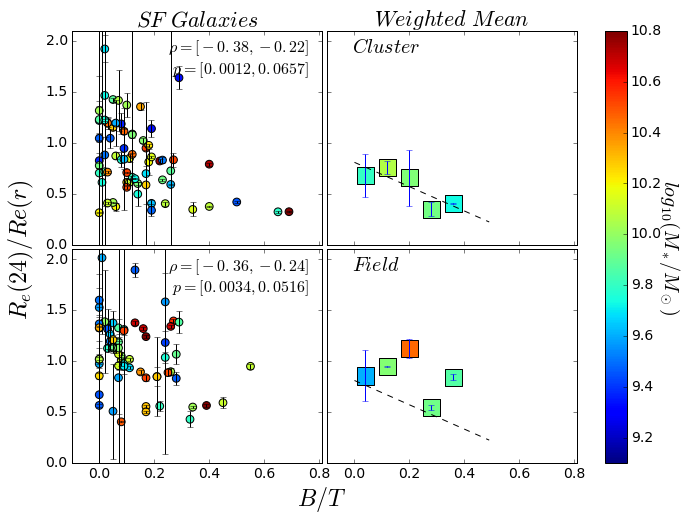

In [8]:
s.plotsizeBTblue()

This shows $R_e(24)/R_e(r)$ vs. B/T for cluster and field galaxies.  The left panels show the values for individual galaxies.  The $\rho$ values indicates the 68% confidence interval for the Spearman rank correlation coeffienct, which I determine using Monte Carlo resampling.  The Monte Carlo code assumes that the errors reported by galfit for $R_e(24)$ are gaussion - this is not likely to be true, but it's better than nothing.

Correlation is less significant among field galaxies.

## Galfit Simulations

I decided to put these in a separate notebook.

## Sanity Checks that Won't Make the Paper

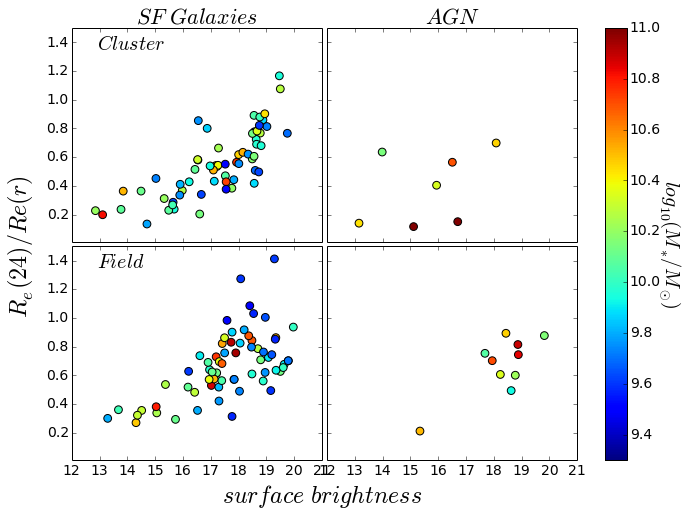

In [95]:
s.plotsizesb()

At first glance, this seems disconcerting, but the two variables are correlated b/c I use Re(24) to calculate surface brightness.  So larger Re(24) should have fainter surface brightness.

## Strange Correlations with B/A

R partial correlation analysis shows some very strong correlations between B/A and parameters I would expect to be correlated.

    stellar mass
    SFR
    surface density
    NUV24 color - this one is not surprising
    

Spearman Rank Test:
rho =  -0.10
p-vale = 0.24045 (prob that samples are uncorrelated)


(-0.10450061783194542, 0.24045179039239883)

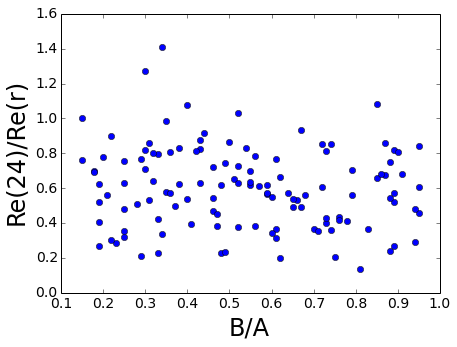

In [6]:
figure()
plot(s.s.fcaxisratio1[s.sampleflag & ~s.agnflag],s.s.SIZE_RATIO[s.sampleflag & ~s.agnflag],'bo')
xlabel('B/A')
ylabel('Re(24)/Re(r)')
spearman(s.s.fcaxisratio1[s.sampleflag & ~s.agnflag],s.s.SIZE_RATIO[s.sampleflag & ~s.agnflag])

In [7]:
s.s.columns

ColDefs(
    name = 'NSAID'; format = 'J'
    name = 'IAUNAME'; format = '19A'
    name = 'SUBDIR'; format = '27A'
    name = 'RA'; format = 'E'
    name = 'DEC'; format = 'E'
    name = 'ZDIST'; format = 'E'
    name = 'SERSIC_TH50'; format = 'E'
    name = 'SERSIC_N'; format = 'E'
    name = 'SERSIC_BA'; format = 'E'
    name = 'SERSIC_PHI'; format = 'E'
    name = 'PETROTH50'; format = 'E'
    name = 'PETROTH90'; format = 'E'
    name = 'D4000'; format = 'E'
    name = 'HAEW'; format = 'E'
    name = 'VDISP'; format = 'E'
    name = 'FA'; format = 'E'
    name = 'HAFLUX'; format = 'E'
    name = 'N2FLUX'; format = 'E'
    name = 'HBFLUX'; format = 'E'
    name = 'O3FLUX'; format = 'E'
    name = 'AHDEW'; format = 'E'
    name = 'AV'; format = 'E'
    name = 'ISDSS'; format = 'J'
    name = 'IALFALFA'; format = 'J'
    name = 'NMGY'; format = '7D'
    name = 'NMGY_IVAR'; format = '7D'
    name = 'ABSMAG'; format = '7D'
    name = 'SERSICFLUX'; format = '7D'
    name = 'CLUMPY'; forma

Spearman Rank Test:
rho =   0.17
p-vale = 0.06152 (prob that samples are uncorrelated)


(0.16909842938184738, 0.061521047726273537)

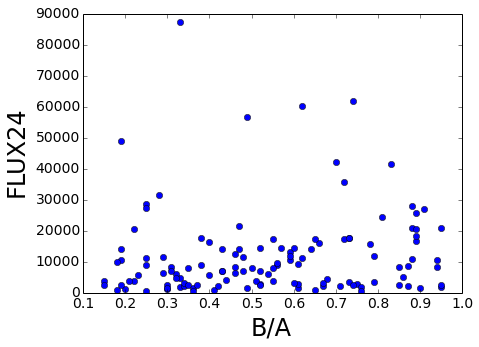

In [14]:
figure()
plot(s.s.fcaxisratio1[s.sampleflag & ~s.agnflag],s.s.FLUX24[s.sampleflag & ~s.agnflag],'bo')
xlabel('B/A')
ylabel('FLUX24')
spearman(s.s.fcaxisratio1[s.sampleflag & ~s.agnflag],s.s.FLUX24[s.sampleflag & ~s.agnflag])

Spearman Rank Test:
rho =  -0.40
p-vale = 0.00000 (prob that samples are uncorrelated)


(-0.39960289001464844, 4.6763316277065314e-06)

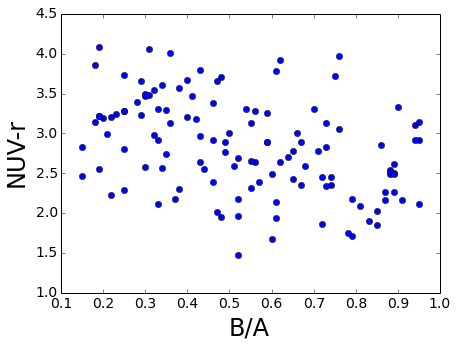

In [13]:
figure()
plot(s.s.fcaxisratio1[s.sampleflag & ~s.agnflag],s.NUVr[s.sampleflag & ~s.agnflag],'bo')
xlabel('B/A')
ylabel('NUV-r')
spearman(s.s.fcaxisratio1[s.sampleflag & ~s.agnflag],s.NUVr[s.sampleflag & ~s.agnflag])

## Quick Calculation to Find MIPS vs HST resolution comparison

I make the claim that the MIPS data is much lower resolution and SNR than typically used with galfit, but Greg said no.

Median redshift of my sample is $$z=0.03.$$  At this distance, there are $$0.604~kpc/arcsec.$$  The MIPS pixel size is 2.45 arcsec, so this means 1.48 kpc per resolution element.  

The pixel size of Hubble is 0.1 arcsec/pixel.  Therefore, to get 1.48 kpc per resolution element, we want to find the redshift where that angular diameter distance corresponds to $\sim$14.8 kpc/arcsec.  Using Ned Wright's cosmology calculator to figure this out.  Can't seem to get this to ever get that high.  The max value peaks around $z = 1.6$ at 8.615 kpc/arcsec.

So, it looks like my statement is correct.